In [ ]:
# 20面体

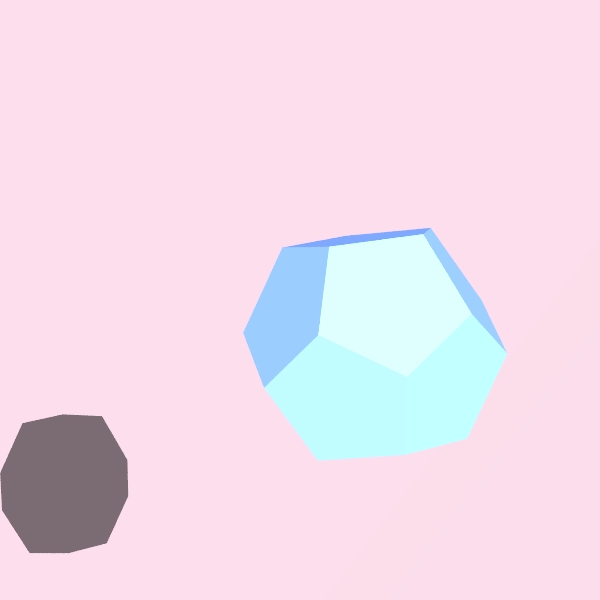

In [13]:
from vapory import *
from math import cos,sin,pi
# Mathからコサイン、サイン、円周率を呼び出す

camera = Camera( 'ultra_wide_angle', 'angle', 10, #カメラの位置、アングルの設定
                 'location', [25 , 25 , 25],
                 'look_at',  [0.0 , 0.0 , 0.0])

sun = LightSource([1500,2500,2500], 'color',1) #光源の設定

sky = Sphere([0,0,0], #空の設定
             1,
             'hollow',
             Texture(Pigment('gradient',
                             [0,1,0],
                             ColorMap([0,'color','White'],[1, 'color', 'Blue' ]),
                             'quick_color',
                             'White'
                            ),
                     Finish('ambient',
                            1,
                            'diffuse', 
                            0
                           )
                    ),
              'scale',
              10000
             )

ground =    Plane(  [0,0,-20], 20 , #地面の設定
            Texture( Pigment( 'color', [1.1*e for e in [1.80,1.35,1.55]])),
            Finish(  'phong', 0.1 )) #Phongシェーディング

# x = (pow(5,1.0/2.0)+1)/2 #ルート5

"""
Ａ：(1, √3, (-3-√5)/2)
Ｂ：(-2, 0, (-3-√5)/2)
Ｃ：(1, -√3, (-3-√5)/2)
Ｄ：(-(1+√5)/2, -(1+√5)√3/2, (1-√5)/2)
Ｅ：(1+√5, 0, (1-√5)/2)
Ｆ：(-(1+√5)/2, (1+√5)√3/2, (1-√5)/2)
Ｇ：((1+√5)/2, (1+√5)√3/2, (√5-1)/2)
Ｈ：(-1-√5, 0, (√5-1)/2)
Ｉ：((1+√5)/2, -(1+√5)√3/2, (√5-1)/2)
Ｊ：(-1, -√3, (3+√5)/2)
Ｋ：(2, 0, (3+√5)/2)
Ｌ：(-1, √3, (3+√5)/2)

[1, pow(3,1.0/2.0), -3-(pow(5,1.0/2.0)/2]  #a=0
[-2, 0, -3-(pow(5,1.0/2.0)/2]              #b=1
(1, pow(-3,1.0/2.0), -3-(pow(5,1.0/2.0)/2] #c=2
Ｄ：(-(1+√5)/2, -(1+√5)√3/2, (1-√5)/2)      #d=3
Ｅ：(1+√5, 0, (1-√5)/2)                     #e=4
Ｆ：(-(1+√5)/2, (1+√5)√3/2, (1-√5)/2)       #f=5
Ｇ：((1+√5)/2, (1+√5)√3/2, (√5-1)/2)        #g=6
Ｈ：(-1-√5, 0, (√5-1)/2)                    #h=7
Ｉ：((1+√5)/2, -(1+√5)√3/2, (√5-1)/2)       #i=8
Ｊ：(-1, -√3, (3+√5)/2)                     #j=9
Ｋ：(2, 0, (3+√5)/2)                        #k=10
Ｌ：(-1, √3, (3+√5)/2)                      #l=11
"""

mesh = Mesh2(
    VertexVectors( #正12面体の20の頂点座標 #xyzの座標指定
        20, 
        [1,0,0],                                                 #a=0
        [cos(72*((2*pi)/360)),sin(72*((2*pi)/360)),0],           #b=1
        [-cos(36*((2*pi)/360)),sin(36*((2*pi)/360)),0],          #c=2
        [-cos(36*((2*pi)/360)),-sin(36*((2*pi)/360)),0],         #d=3
        [cos(72*((2*pi)/360)),-sin(72*((2*pi)/360)),0],          #e=4
        [x,0,1],                                                 #f=5
        [x*(cos(72*((2*pi)/360))),x*(sin(72*((2*pi)/360))),1],   #h=6
        [-x*(cos(36*((2*pi)/360))),x*(sin(36*((2*pi)/360))),1],  #j=7
        [x*(-cos(36*((2*pi)/360))),x*(-sin(36*((2*pi)/360))),1], #l=8
        [x*(cos(72*((2*pi)/360))),-x*(sin(72*((2*pi)/360))),1],  #n=9
        [x*(cos(36*((2*pi)/360))),x*(sin(36*((2*pi)/360))),x],   #g=10
        [-x*(cos(72*((2*pi)/360))),x*(sin(72*((2*pi)/360))),x],  #i=11
        [-x,0,x],                                                #k=12
        [-x*(cos(72*((2*pi)/360))),-x*(sin(72*((2*pi)/360))),x], #m=13
        [x*(cos(36*((2*pi)/360))),-x*(sin(36*((2*pi)/360))),x],  #o=14
        [-1,0,x+1],                                              #p=15
        [-cos(72*((2*pi)/360)),-sin(72*((2*pi)/360)),x+1],       #q=16
        [cos(36*((2*pi)/360)),-sin(36*((2*pi)/360)),x+1],        #r=17
        [cos(36*((2*pi)/360)),sin(36*((2*pi)/360)),x+1],         #s=18
        [-cos(72*((2*pi)/360)),sin(72*((2*pi)/360)),x+1]         #t=19
    ),
    FaceIndices( #VertexVectorsの配列から数字(順番)を指定して呼び出す
        20,
        []
    ),
    Pigment('color', [1.1*e for e in [1.0,1.85,6.85]])
)

scene = Scene(camera, [sun,sky,ground,mesh],
               included=['colors.inc', 'textures.inc'])

scene.render('ipython', width=600, height=600, antialiasing=0.001)